Note:
 * References are given at the end and #[#i] along the cells- denote the reference no. i.
 *


In [6]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For data normalization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

In [7]:
#!pip install statsmodels


##### **NSRDB DATASET** - **Region IITB hospital**
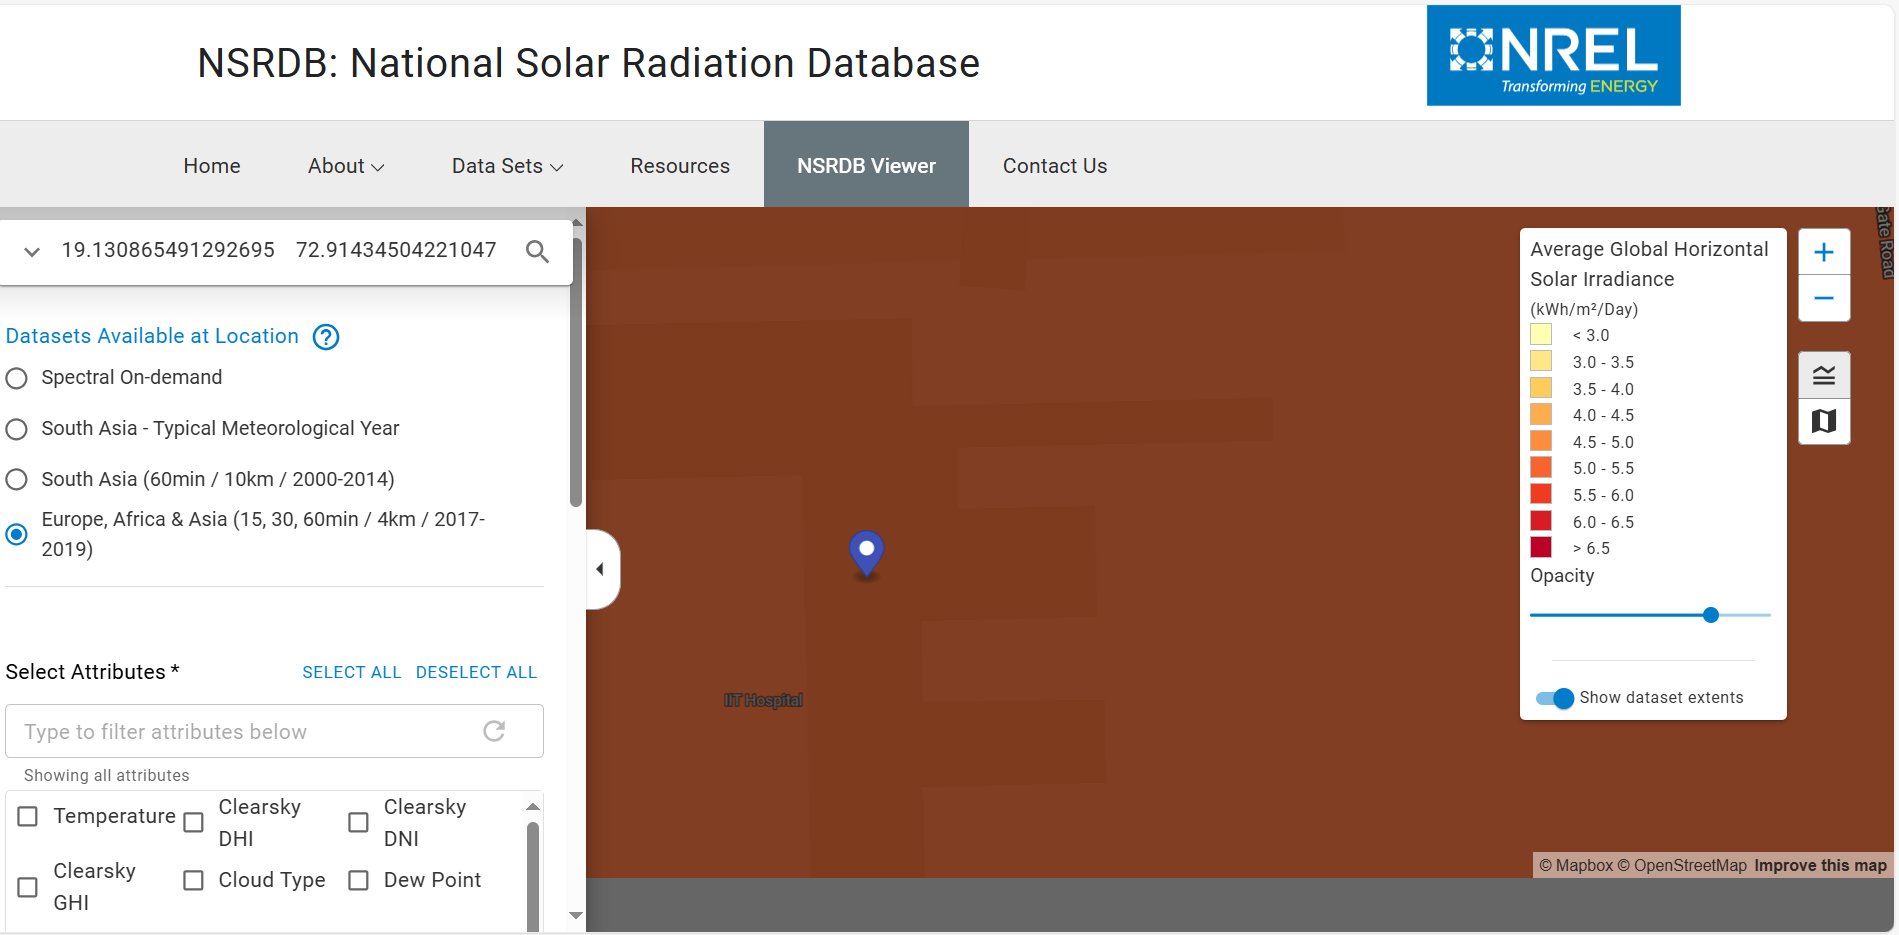

### **Data preprocessing**

In [8]:
data = pd.read_csv('/content/3066092_19.13_72.90_2017.csv', skiprows=2)

# Initial data inspection
print(data.info())  # Summary of the dataset to understand its structure
print(data.describe())
data.head() # To Display the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                35040 non-null  int64  
 1   Month               35040 non-null  int64  
 2   Day                 35040 non-null  int64  
 3   Hour                35040 non-null  int64  
 4   Minute              35040 non-null  int64  
 5   Temperature         35040 non-null  float64
 6   Clearsky DHI        35040 non-null  int64  
 7   Clearsky DNI        35040 non-null  int64  
 8   Clearsky GHI        35040 non-null  int64  
 9   Cloud Type          35040 non-null  int64  
 10  Dew Point           35040 non-null  float64
 11  DHI                 35040 non-null  int64  
 12  DNI                 35040 non-null  int64  
 13  Fill Flag           35040 non-null  int64  
 14  GHI                 35040 non-null  int64  
 15  Ozone               35040 non-null  float64
 16  Rela

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,2017,1,1,0,0,19.6,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,0,15,19.5,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,0,30,19.4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,0,45,19.3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,1,0,19.2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking for zero values in DNI, GHI, DHI
print("\nCount of Zero Values in DNI, GHI, and DHI:")
for col in ['DNI', 'GHI', 'DHI']:
    print(f"{col}: {(data[col] == 0).sum()} rows")

# Inspecting the time-related columns (Year, Month, Day, Hour, Minute)
for col in ['Year', 'Month', 'Day', 'Hour', 'Minute']:
    print(f"Unique Values in {col}:")
    print(data[col].unique())


Count of Zero Values in DNI, GHI, and DHI:
DNI: 19821 rows
GHI: 17646 rows
DHI: 17646 rows
Unique Values in Year:
[2017]
Unique Values in Month:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique Values in Day:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique Values in Hour:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique Values in Minute:
[ 0 15 30 45]


In [10]:
data= data.drop(columns=[col for col in data.columns if 'Unnamed' in col])# removing 'Unamed' column
print("columns after removing 'Unnamed' columns :", data.columns)
# Convert Year, Month, Day, Hour, Minute to a datetime index
data['Timestamp'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data.set_index('Timestamp', inplace=True)

# Drop redundant time columns
data.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace=True)
print("\ncolumns after creating new index 'Timestamp':",data.columns)

columns after removing 'Unnamed' columns : Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

columns after creating new index 'Timestamp': Index(['Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')


In [11]:
data.head()

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
Timestamp,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,19.6,0,0,0,0,15.0,0,0,0,0,0.247,74.95,175.25,0.12,1006,1.6,57,2.0
2017-01-01 00:15:00,19.5,0,0,0,0,15.0,0,0,0,0,0.247,75.34,176.02,0.12,1005,1.6,59,2.0
2017-01-01 00:30:00,19.4,0,0,0,0,15.0,0,0,0,0,0.247,75.81,174.21,0.12,1005,1.6,61,2.0
2017-01-01 00:45:00,19.3,0,0,0,0,14.4,0,0,0,0,0.247,73.40,171.30,0.12,1005,1.6,64,2.0
2017-01-01 01:00:00,19.2,0,0,0,0,14.4,0,0,0,0,0.248,73.86,168.07,0.12,1005,1.6,66,2.0


In [12]:
# function to get the Clearsky and other DHI,DNI,GHI which are not same
# from first few entries it seems to be similar
def check_clearsky(clearsky_dhi, clearsky_dni, clearsky_ghi, dhi, dni, ghi):
  # Store the original index before converting to NumPy arrays
  original_index = clearsky_dhi.index
  # Convert pandas Series to NumPy arrays.
  clearsky_dhi = clearsky_dhi.to_numpy()
  clearsky_dni = clearsky_dni.to_numpy()
  clearsky_ghi = clearsky_ghi.to_numpy()
  dhi = dhi.to_numpy()
  dni = dni.to_numpy()
  ghi = ghi.to_numpy()

  # Check equality for each irradiance component
  dhi_equal = np.equal(clearsky_dhi, dhi)
  dni_equal = np.equal(clearsky_dni, dni)
  ghi_equal = np.equal(clearsky_ghi, ghi)

  # Combine results using logical AND to find rows where all are equal
  all_equal = np.logical_and(dhi_equal, np.logical_and(dni_equal, ghi_equal))

  # Return a pandas Series with the results
  return pd.Series(all_equal, index=original_index)


Clearsky_DHI = data['Clearsky DHI']
Clearsky_DNI = data['Clearsky DNI']
Clearsky_GHI = data['Clearsky GHI']
DHI = data['DHI']
DNI = data['DNI']
GHI = data['GHI']

result_series = check_clearsky(Clearsky_DHI, Clearsky_DNI, Clearsky_GHI, DHI, DNI, GHI)
different_rows = data[~result_series]

# Display the different_rows DataFrame
pd.set_option('display.max_rows', 80)
different_rows

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
Timestamp,,,,,,,,,,,,,,,,,,
2017-01-07 12:00:00,27.4,151,859,793,2,10.6,340,368,0,615,0.228,34.95,41.61,0.12,1005,1.2,284,1.5
2017-01-07 12:15:00,27.4,151,860,796,2,10.6,345,355,0,610,0.228,34.95,41.45,0.12,1005,1.2,283,1.7
2017-01-07 12:30:00,27.5,151,859,793,2,10.6,349,333,0,598,0.228,34.71,41.62,0.12,1004,1.2,281,1.8
2017-01-07 13:15:00,27.5,149,846,757,2,11.1,346,268,0,539,0.228,35.96,43.98,0.12,1004,1.3,279,2.2
2017-01-08 12:00:00,27.7,155,839,783,2,15.0,360,294,0,580,0.228,45.96,41.48,0.12,1005,1.9,263,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 11:30:00,28.7,169,800,750,7,9.5,260,541,0,653,0.239,30.20,43.46,0.12,1008,1.2,186,1.6
2017-12-29 11:45:00,28.9,174,796,758,7,9.6,261,550,0,665,0.239,30.03,42.78,0.12,1008,1.2,190,1.5
2017-12-29 12:00:00,29.1,174,798,764,7,9.6,265,545,0,668,0.238,29.68,42.40,0.12,1008,1.2,194,1.5


#### **Data visualization before some steps**

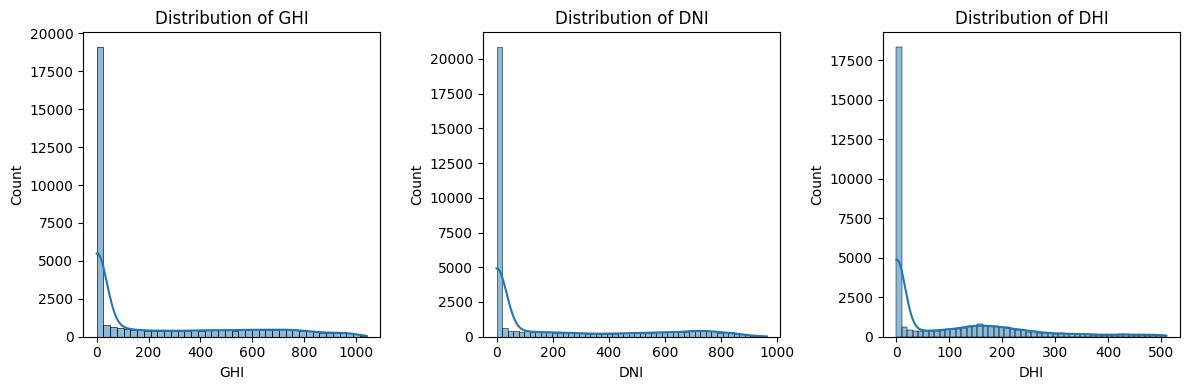

In [13]:
#check distribution of GHI, DNI, DHI

plt.figure(figsize=(12, 4))  #

for i, col in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i + 1) # i + 1 since subplot indexing starts from 1
    sns.histplot(data[col], kde=True)  # Plot histogram with kernel density estimation
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the plot

**Zerovalue is dominating since in nigth time DNI GHI and DHI are zero, hence plotting distribution except zero values**

In [14]:
from scipy import stats
import statsmodels.api as sm

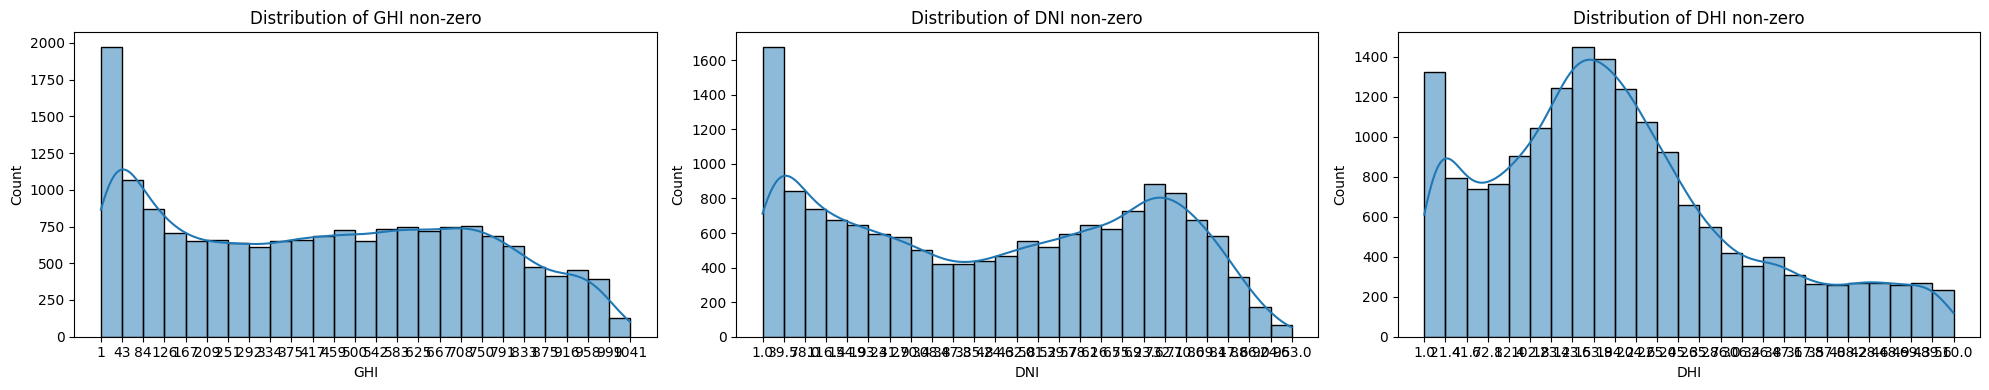

In [15]:
#check distribution of GHI, DNI, DHI when 0 vals are not considerd

plt.figure(figsize=(20, 4))

for i, col in enumerate(['GHI', 'DNI', 'DHI']):
    ax = plt.subplot(1, 3, i + 1)                                               # i + 1 since subplot indexing starts from 1
    nonzero_data = data[data[col] != 0][col]
    num_bins = 25
    hist, bin_edges = np.histogram(nonzero_data, bins=num_bins)
    sns.histplot(nonzero_data, kde=True, bins=bin_edges, ax=ax)                 # Plot histogram with kernel density
    plt.title(f'Distribution of {col} non-zero')
    plt.xticks(bin_edges)                                                       # Set x-axis ticks to bin edges

    # Define start and end within the loop based on nonzero_data
    # start = int(nonzero_data.min())
    # end = int(nonzero_data.max()) + 1
    # ax.set_xticks(np.arange(start, end, 50))

plt.tight_layout()                                                        # Adjust spacing between subplots
plt.show()                                                                # Display the plot

<Figure size 1200x400 with 0 Axes>

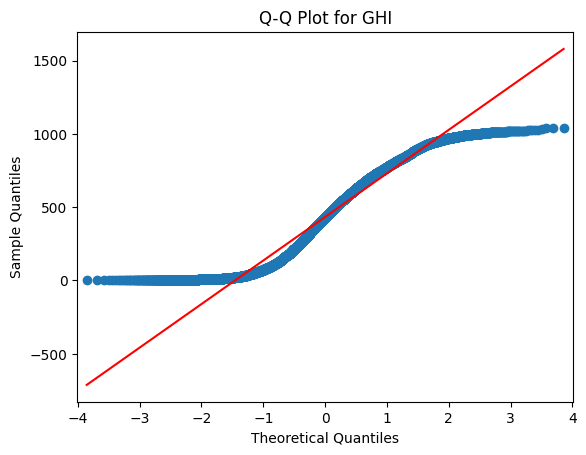

<Figure size 1200x400 with 0 Axes>

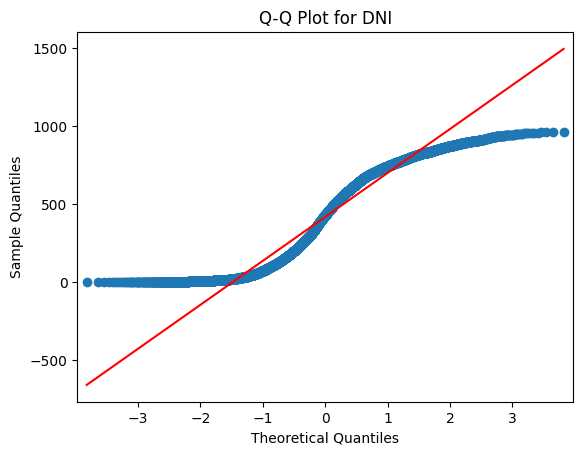

<Figure size 1200x400 with 0 Axes>

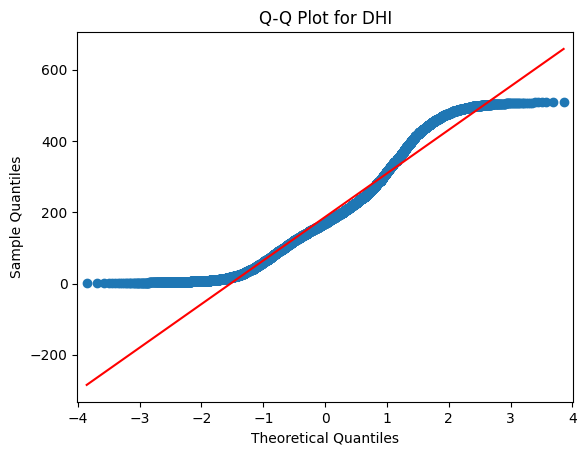

In [16]:
for i, col in enumerate(['GHI', 'DNI', 'DHI']):
    # Q-Q Plot
    nonzero_data = data[data[col] != 0][col]
    plt.figure(figsize=(12, 4))                                                                # Create a new figure for each Q-Q plot
    sm.qqplot(nonzero_data, line='s')
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

In [17]:
# Define a threshold for solar zenith angle (e.g., above 90° is nighttime)
#data['is_night'] = (data['Solar Zenith Angle'] > 90).astype(int)

# Check correlation of DNI, GHI, and DHI with 'is_night'
#print(data[['DNI', 'GHI', 'DHI', 'is_night']].corr())

# Create a new derived features
data['Solar Elevation Angle'] = 90 - data['Solar Zenith Angle']

#### **Data spliting**

In [18]:
# DATA 1 nontimeseries
data_non_time_series = data.copy()

# Target variable
target = 'GHI'

# Splitting data_non_time_series for ML/DL models
X_nts = data_non_time_series.drop(columns=[target])
y_nts = data_non_time_series[target]

X_train_nts, X_test_nts, y_train_nts, y_test_nts = train_test_split(
    X_nts, y_nts, test_size=0.2, random_state=42, shuffle=True
)


# Display shapes for confirmation
print("Data for ML/DL Models:")
print(f"X_train_nts: {X_train_nts.shape}, X_test_nts: {X_test_nts.shape}")
print(f"y_train_nts: {y_train_nts.shape}, y_test_nts: {y_test_nts.shape}")
print(data_non_time_series.shape)

# Scale the features
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
X_train_nts_scaled = scaler2.fit_transform(X_train_nts)
X_test_nts_scaled = scaler2.transform(X_test_nts)

Data for ML/DL Models:
X_train_nts: (28032, 18), X_test_nts: (7008, 18)
y_train_nts: (28032,), y_test_nts: (7008,)
(35040, 19)


In [19]:
# Filter out data before 2017-01-01 01:00:00
# df = df[df['Timestamp'] >= pd.to_datetime('2017-01-01 01:00:00')]

# DATA 2 to include timeseries lagged features
data_time_series = data.copy()

# Generate lag features for DNI, GHI, DHI
for col in ['DNI', 'GHI', 'DHI']:
    data_time_series[f'{col}_lag1'] = data_time_series[col].shift(1)  # Lag by 1 time step
    data_time_series[f'{col}_lag3'] = data_time_series[col].shift(3)  # Lag by 3 time steps

# Generate rolling averages for DNI, GHI, DHI
for col in ['DNI', 'GHI', 'DHI']:
    data_time_series[f'{col}_rolling3'] = data_time_series[col].rolling(window=3).mean()  # 3-hour rolling average

# Add day of the year
data_time_series['Day of Year'] = data_time_series.index.day_of_year

# Drop rows with NaN values generated by lagging/rolling
data_time_series.dropna(inplace=True)

In [20]:
print("\nTimes-series Data after Feature Engineering:")
# Set the maximum number of columns to display to None (unlimited)
pd.set_option('display.max_columns', None)
from google.colab.data_table import DataTable
DataTable.max_columns = 40
pd.set_option('display.max_rows', 80)
print(data_time_series.shape)
data_time_series


Times-series Data after Feature Engineering:
(35037, 29)


,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Solar Elevation Angle,DNI_lag1,DNI_lag3,GHI_lag1,GHI_lag3,DHI_lag1,DHI_lag3,DNI_rolling3,GHI_rolling3,DHI_rolling3,Day of Year
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:45:00,19.3,0,0,0,0,14.4,0,0,0,0,0.247,73.40,171.30,0.12,1005,1.6,64,2.0,-81.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2017-01-01 01:00:00,19.2,0,0,0,0,14.4,0,0,0,0,0.248,73.86,168.07,0.12,1005,1.6,66,2.0,-78.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2017-01-01 01:15:00,19.1,0,0,0,0,14.4,0,0,0,0,0.248,74.32,164.73,0.12,1005,1.6,68,1.9,-74.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2017-01-01 01:30:00,19.1,0,0,0,0,14.4,0,0,0,0,0.248,74.32,161.33,0.12,1005,1.6,69,1.9,-71.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2017-01-01 01:45:00,19.0,0,0,0,0,14.0,0,0,0,0,0.248,72.63,157.91,0.12,1005,1.6,71,1.9,-67.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00,20.1,0,0,0,0,15.6,0,0,0,0,0.246,75.57,159.44,0.12,1006,1.7,41,2.0,-69.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365
2017-12-31 23:00:00,20.0,0,0,0,0,15.6,0,0,0,0,0.247,76.03,162.86,0.12,1006,1.7,46,2.0,-72.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365
2017-12-31 23:15:00,19.9,0,0,0,0,15.6,0,0,0,0,0.247,76.51,166.24,0.12,1006,1.7,48,2.0,-76.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365


In [21]:
# Target variable
target = 'GHI'

# Splitting data_time_series for time-series models
X_time_series = data_time_series.drop(columns=[target])
y_time_series = data_time_series[target]

X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    X_time_series, y_time_series, test_size=0.2, random_state=42, shuffle=False
)

print("\nData for Time-Series Models:")
print(f"X_train_ts: {X_train_ts.shape}, X_test_ts: {X_test_ts.shape}")
print(f"y_train_ts: {y_train_ts.shape}, y_test_ts: {y_test_ts.shape}")

X_train_ts_scaled = scaler2.fit_transform(X_train_ts)
X_test_ts_scaled = scaler2.transform(X_test_ts)



Data for Time-Series Models:
X_train_ts: (28029, 28), X_test_ts: (7008, 28)
y_train_ts: (28029,), y_test_ts: (7008,)


 ##### **For Non-time-series Data:**

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
    }

    return metrics

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# For nontimeseries data
print("For Non-time-series Data:")
# Train and evaluate Random Forest
print("\nRandom Forest Performance:")
rf_metrics = evaluate_model(rf_model, X_train_nts_scaled, y_train_nts, X_test_nts_scaled, y_test_nts)
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Train and evaluate Gradient Boosting
print("\nGradient Boosting Performance:")
gb_metrics = evaluate_model(gb_model, X_train_nts_scaled, y_train_nts, X_test_nts_scaled, y_test_nts)
for metric, value in gb_metrics.items():
    print(f"{metric}: {value:.4f}")


For Non-time-series Data:

Random Forest Performance:
Train RMSE: 0.8310
Test RMSE: 2.4886
Train MAE: 0.2321
Test MAE: 0.6241
Train R²: 1.0000
Test R²: 0.9999

Gradient Boosting Performance:
Train RMSE: 7.2219
Test RMSE: 7.6674
Train MAE: 3.8665
Test MAE: 4.0522
Train R²: 0.9994
Test R²: 0.9993


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_nts, y_train_nts)

print("Best Parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}


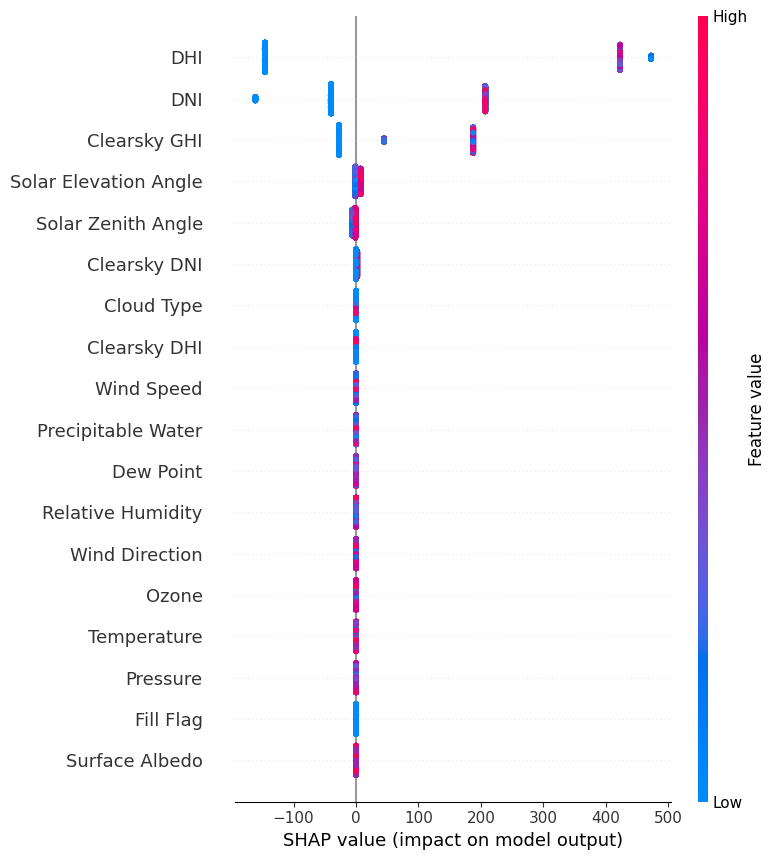

In [24]:
import shap

explainer = shap.Explainer(rf_model)  # Random Forest
shap_values = explainer(X_test_nts)

shap.summary_plot(shap_values, X_test_nts, feature_names=X_nts.columns)


##### **For Time-series Data:**

In [25]:
print("For Time-series Data:")
# Train and evaluate Random Forest
print("\nRandom Forest Performance:")
rf_metrics = evaluate_model(rf_model, X_train_ts_scaled, y_train_ts, X_test_ts_scaled, y_test_ts)
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Train and evaluate Gradient Boosting
print("\nGradient Boosting Performance:")
gb_metrics = evaluate_model(gb_model, X_train_ts_scaled, y_train_ts, X_test_ts_scaled, y_test_ts)
for metric, value in gb_metrics.items():
    print(f"{metric}: {value:.4f}")


For Time-series Data:

Random Forest Performance:
Train RMSE: 3.0854
Test RMSE: 8.8624
Train MAE: 0.7761
Test MAE: 2.5251
Train R²: 0.9999
Test R²: 0.9990

Gradient Boosting Performance:
Train RMSE: 11.0970
Test RMSE: 11.5542
Train MAE: 5.8449
Test MAE: 6.0401
Train R²: 0.9987
Test R²: 0.9983


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model_tuned = RandomForestRegressor(
    n_estimators=100,  # Reduce the number of trees
    max_depth=10,      # Limit tree depth to prevent overfitting
    min_samples_split=10,  # Increase the minimum samples per split
    random_state=42
)
rf_model_tuned.fit(X_train_ts, y_train_ts)

# Evaluate performance
train_pred_rf = rf_model_tuned.predict(X_train_ts)
test_pred_rf = rf_model_tuned.predict(X_test_ts)

print(f"Tuned RF Train RMSE: {np.sqrt(mean_squared_error(y_train_ts, train_pred_rf))}")
print(f"Tuned RF Test RMSE: {np.sqrt(mean_squared_error(y_test_ts, test_pred_rf))}")


Tuned RF Train RMSE: 7.772024890782739
Tuned RF Test RMSE: 11.345326542450515


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_tuned = GradientBoostingRegressor(
    n_estimators=200,   # Increase number of trees
    learning_rate=0.05, # Reduce learning rate for better generalization
    max_depth=5,        # Limit tree depth
    subsample=0.8,      # Use a random subset of data for training each tree
    random_state=42
)
gb_model_tuned.fit(X_train_ts, y_train_ts)

# Evaluate performance
train_pred_gb = gb_model_tuned.predict(X_train_ts)
test_pred_gb = gb_model_tuned.predict(X_test_ts)

print(f"Tuned GB Train RMSE: {np.sqrt(mean_squared_error(y_train_ts, train_pred_gb))}")
print(f"Tuned GB Test RMSE: {np.sqrt(mean_squared_error(y_test_ts, test_pred_gb))}")


Tuned GB Train RMSE: 4.736380770802875
Tuned GB Test RMSE: 6.928862541204437


In [28]:
#data_cleaned['Temp_Lag1'] = data_cleaned['Temperature'].shift(1)


NameError: name 'data_cleaned' is not defined

In [ ]:
#data_cleaned['Temp_MA3'] = data_cleaned['Temperature'].rolling(window=3).mean()

In [ ]:
#scaler = StandardScaler()
# data_cleaned[['Temperature', 'GHI']] = scaler.fit_transform(data_cleaned[['Temperature', 'GHI']])

In [ ]:
#sns.pairplot(data_cleaned[['Temperature', 'GHI', 'Temp_Lag1', 'Temp_MA3']])
#plt.show()

Feature enginnering

Normalization of Data

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_cleaned[['Temperature', 'GHI']] = scaler.fit_transform(data_cleaned[['Temperature', 'GHI']])


minmax scaling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# data_cleaned[['Temperature', 'GHI']] = min_max_scaler.fit_transform(data_cleaned[['Temperature', 'GHI']])

Data visvalization


pair plot

In [ ]:
# import seaborn as sns
# sns.pairplot(data_cleaned[['Temperature', 'GHI', 'Temp_Lag1', 'Temp_MA3']])
# plt.show()


corelation heat map

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [ ]:
# data_cleaned.info()

missing value handing and feature engineering

In [ ]:
# df = data_cleaned.copy()
# print(df)

In [ ]:
# # df['Temp_Lag1'].fillna(method='ffill', inplace=True)
# # df['Temp_MA3'].fillna(method='ffill', inplace=True)
# # 2. Feature Engineering
# # Create a 'Datetime' feature from Year, Month, Day, Hour, Minute
# df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# # Create additional time-based features
# df['DayOfYear'] = df['Datetime'].dt.dayofyear
# df['WeekOfYear'] = df['Datetime'].dt.isocalendar().week
# df['HourOfDay'] = df['Datetime'].dt.hour

# # Drop original date and time columns
# df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

# # Interaction features (e.g., between Solar Zenith Angle and GHI)
# df['Zenith_GHI'] = df['Solar Zenith Angle'] * df['GHI']
# df['Zenith_DNI'] = df['Solar Zenith Angle'] * df['DNI']

# # Normalize/Standardize relevant features
# from sklearn.preprocessing import StandardScaler

# features_to_scale = ['Temperature', 'GHI', 'DHI', 'DNI',
#                      'Relative Humidity', 'Solar Zenith Angle',
#                      'Surface Albedo', 'Pressure', 'Precipitable Water',
#                      'Wind Speed', 'Temp_Lag1', 'Temp_MA3']

# scaler = StandardScaler()
# df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# # Check the resulting DataFrame
# print(df.head())

Data spliting

In [ ]:
# # Assuming 'df' is your DataFrame and you want to predict solar power (e.g., 'GHI')

# # Define the split ratios
# train_size = int(len(df) * 0.7)
# val_size = int(len(df) * 0.15)

# # Split the data
# train_data = df.iloc[:train_size]
# val_data = df.iloc[train_size:train_size + val_size]
# test_data = df.iloc[train_size + val_size:]

# # Separate features and target variable (assuming target is 'GHI')
# X_train = train_data.drop('GHI', axis=1)
# y_train = train_data['GHI']
# X_val = val_data.drop('GHI', axis=1)
# y_val = val_data['GHI']
# X_test = test_data.drop('GHI', axis=1)
# y_test = test_data['GHI']

# # Check the shapes of the splits
# print(f"Training data shape: {X_train.shape}, {y_train.shape}")
# print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
# print(f"Test data shape: {X_test.shape}, {y_test.shape}")

# df['Datetime'].head()
# X_train['Datetime'].head()

## **Time Series Considerations:**
Ensure that time series splitting respects the order of data.
*   **No Shuffling**: Maintain the original order to avoid data  leakage and to reflect real-world prediction scenarios.
* **Temporal Validation**: Use the validation set to tune hyperparameters and the test set to evaluate final performance.



ARIMA AND SARIMA MODELS

arima

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# # Define ARIMA parameters (p, d, q)
# p = 1  # AutoRegressive order
# d = 1  # Differencing order
# q = 1  # Moving Average order

# # Fit ARIMA model
# arima_model = ARIMA(y_train, order=(p, d, q))
# arima_results = arima_model.fit()

# # Print model summary
# print(arima_results.summary())


In [ ]:
# # Check data types
# # print(y_train.dtypes)
# # print(X_train.dtypes)
# X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
# y_train = pd.to_numeric(y_train, errors='coerce')
# # Check for non-numeric values
# # print(y_train.head())
# # print(X_train.head())


sarima

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# p = 1  # AutoRegressive order
# d = 1  # Differencing order
# q = 1  # Moving Average order
# P = 1  # Seasonal AutoRegressive order
# D = 1  # Seasonal Differencing order
# Q = 1  # Seasonal Moving Average order
# s = 24  # Seasonal cycle length (e.g., hourly data with daily seasonality)
# # Example for SARIMA
# sarima_model = SARIMAX(y_train, exog=X_train, order=(p,d,q), seasonal_order=(P,D,Q,s))
# sarima_results = sarima_model.fit()
# print(sarima_results.summary())

# forecast = sarima_results.get_forecast(steps=len(y_val), exog=X_val)
# forecast_mean = forecast.predicted_mean
# forecast_errors = mean_squared_error(y_val, forecast_mean)
# print(f"Forecast Mean Squared Error: {forecast_errors}")


## **Model building**

random forest and xgboost

In [ ]:
# X_train.head()

In [ ]:
# # drop Temp_lag1 and Temp_MA3 from X_train
# X_train_new = X_train.drop(['Temp_Lag1', 'Temp_MA3', 'Datetime'], axis=1)
# X_val_new = X_val.drop(['Temp_Lag1', 'Temp_MA3', 'Datetime'], axis=1)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

# # Example for Random Forest
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train_new, y_train)
# rf_predictions = rf_model.predict(X_val_new)

# # Example for XGBoost
# xgb_model = XGBRegressor()
# xgb_model.fit(X_train_new, y_train)
# xgb_predictions = xgb_model.predict(X_val_new)

# from sklearn.metrics import mean_squared_error
# print("MSE:", mean_squared_error(y_test, xgb_predictions))

In [ ]:
# from sklearn.model_selection import train_test_split

# # Example: Splitting data into training and testing sets
# X = data_cleaned[['Temperature']]
# y = data_cleaned['GHI']  # Replace with your actual target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a simple model, e.g., Linear Regression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# from sklearn.metrics import mean_squared_error
# print("MSE:", mean_squared_error(y_test, y_pred))